# NFL DATA

In [1]:
import pandas as pd
import numpy as np

import os

import matplotlib.pyplot as plt 
import seaborn as sns

## Wrangle

In [77]:
data = os.listdir('data')
data = [dat for dat in data if dat.endswith('csv')]
data.sort()
data

['games.csv',
 'pffScoutingData.csv',
 'players.csv',
 'plays.csv',
 'week1.csv',
 'week2.csv',
 'week3.csv',
 'week4.csv',
 'week5.csv',
 'week6.csv',
 'week7.csv',
 'week8.csv']

### Acquire & prep game data

In [81]:
games = pd.read_csv('data/games.csv')
games

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr
0,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL
1,2021091200,2021,1,09/12/2021,13:00:00,ATL,PHI
2,2021091201,2021,1,09/12/2021,13:00:00,BUF,PIT
3,2021091202,2021,1,09/12/2021,13:00:00,CAR,NYJ
4,2021091203,2021,1,09/12/2021,13:00:00,CIN,MIN
...,...,...,...,...,...,...,...
117,2021103109,2021,8,10/31/2021,16:05:00,SEA,JAX
118,2021103110,2021,8,10/31/2021,16:25:00,DEN,WAS
119,2021103111,2021,8,10/31/2021,16:25:00,NO,TB
120,2021103112,2021,8,10/31/2021,20:20:00,MIN,DAL


In [82]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 7 columns):
gameId             122 non-null int64
season             122 non-null int64
week               122 non-null int64
gameDate           122 non-null object
gameTimeEastern    122 non-null object
homeTeamAbbr       122 non-null object
visitorTeamAbbr    122 non-null object
dtypes: int64(3), object(4)
memory usage: 6.8+ KB


In [83]:
games.gameDate = games.gameDate.astype('datetime64')
games.gameTimeEastern = games.gameTimeEastern.astype('datetime64')

### Acquire & prep player data

In [84]:
players = pd.read_csv('data/players.csv')
players

,nflId,height,weight,birthDate,collegeName,officialPosition,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,28963,6-5,240,1982-03-02,"Miami, O.",QB,Ben Roethlisberger
2,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
3,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
4,30078,6-2,228,1982-11-24,Harvard,QB,Ryan Fitzpatrick
...,...,...,...,...,...,...,...
1674,53991,6-1,320,NaN,NaN,DT,Forrest Merrill
1675,53994,6-5,300,NaN,NaN,C,Ryan McCollum
1676,53999,6-4,312,NaN,NaN,DT,Jack Heflin
1677,54006,6-6,330,NaN,NaN,T,Jake Curhan


In [85]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1679 entries, 0 to 1678
Data columns (total 7 columns):
nflId               1679 non-null int64
height              1679 non-null object
weight              1679 non-null int64
birthDate           1447 non-null object
collegeName         1455 non-null object
officialPosition    1679 non-null object
displayName         1679 non-null object
dtypes: int64(2), object(5)
memory usage: 91.9+ KB


In [86]:
players['inches'] = players.height.str.split('-', expand=True)[0].astype(int) * 12
players.inches = players.height.str.split('-', expand=True)[1].astype(int) + players.inches

In [87]:
players

,nflId,height,weight,birthDate,collegeName,officialPosition,displayName,inches
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady,76
1,28963,6-5,240,1982-03-02,"Miami, O.",QB,Ben Roethlisberger,77
2,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters,76
3,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers,74
4,30078,6-2,228,1982-11-24,Harvard,QB,Ryan Fitzpatrick,74
...,...,...,...,...,...,...,...,...
1674,53991,6-1,320,NaN,NaN,DT,Forrest Merrill,73
1675,53994,6-5,300,NaN,NaN,C,Ryan McCollum,77
1676,53999,6-4,312,NaN,NaN,DT,Jack Heflin,76
1677,54006,6-6,330,NaN,NaN,T,Jake Curhan,78


In [88]:
players.officialPosition.value_counts().sort_index()

C       55
CB     192
DB       2
DE     142
DT     114
FB      15
FS      72
G       99
ILB     81
LB       2
MLB     27
NT      34
OLB    136
QB      60
RB     126
SS      69
T      122
TE     121
WR     210
Name: officialPosition, dtype: int64

In [89]:
players['side'] = np.where(players.officialPosition.isin(['QB','WR', 'RB','C','FB','G','NT','T','TE']),
         'offense', 'defense')

In [90]:
players

,nflId,height,weight,birthDate,collegeName,officialPosition,displayName,inches,side
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady,76,offense
1,28963,6-5,240,1982-03-02,"Miami, O.",QB,Ben Roethlisberger,77,offense
2,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters,76,offense
3,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers,74,offense
4,30078,6-2,228,1982-11-24,Harvard,QB,Ryan Fitzpatrick,74,offense
...,...,...,...,...,...,...,...,...,...
1674,53991,6-1,320,NaN,NaN,DT,Forrest Merrill,73,defense
1675,53994,6-5,300,NaN,NaN,C,Ryan McCollum,77,offense
1676,53999,6-4,312,NaN,NaN,DT,Jack Heflin,76,defense
1677,54006,6-6,330,NaN,NaN,T,Jake Curhan,78,offense


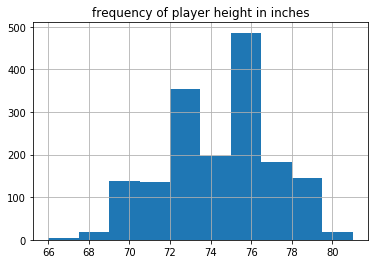

In [91]:
players.inches.hist()
plt.title('frequency of player height in inches')
plt.show()

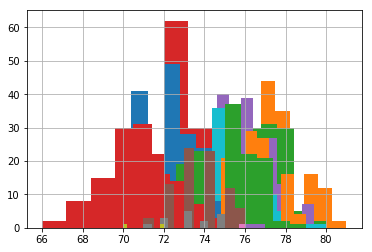

In [92]:
for pos in players.officialPosition.unique():
    players.inches [players.officialPosition == pos].hist()

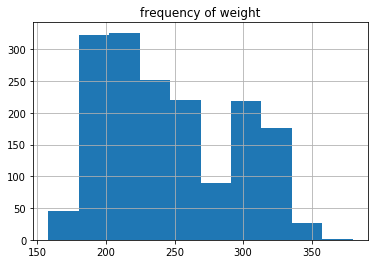

In [93]:
players.weight.hist()
plt.title('frequency of weight')
plt.show()

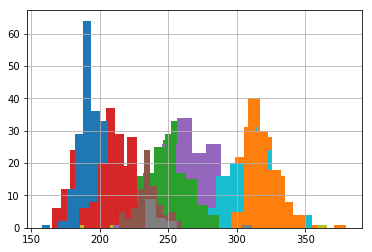

In [94]:
for pos in players.officialPosition.unique():
    players.weight [players.officialPosition == pos].hist()

### Acquire & prep plays data

In [97]:
plays = pd.read_csv('data/plays.csv')
plays.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,...,foulNFLId3,absoluteYardlineNumber,offenseFormation,personnelO,defendersInBox,personnelD,dropBackType,pff_playAction,pff_passCoverage,pff_passCoverageType
0,2021090900,97,(13:33) (Shotgun) T.Brady pass incomplete deep...,1,3,2,TB,DAL,TB,33,...,NaN,43.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man
1,2021090900,137,(13:18) (Shotgun) D.Prescott pass deep left to...,1,1,10,DAL,TB,DAL,2,...,NaN,108.0,EMPTY,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 4 LB, 3 DB",TRADITIONAL,0,Cover-3,Zone
2,2021090900,187,(12:23) (Shotgun) D.Prescott pass short middle...,1,2,6,DAL,TB,DAL,34,...,NaN,76.0,SHOTGUN,"0 RB, 2 TE, 3 WR",6.0,"3 DL, 3 LB, 5 DB",TRADITIONAL,0,Cover-3,Zone
3,2021090900,282,(9:56) D.Prescott pass incomplete deep left to...,1,1,10,DAL,TB,TB,39,...,NaN,49.0,SINGLEBACK,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 3 LB, 4 DB",TRADITIONAL,1,Cover-3,Zone
4,2021090900,349,(9:46) (Shotgun) D.Prescott pass incomplete sh...,1,3,15,DAL,TB,TB,44,...,NaN,54.0,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"3 DL, 4 LB, 4 DB",TRADITIONAL,0,Cover-3,Zone


In [98]:
plays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8557 entries, 0 to 8556
Data columns (total 32 columns):
gameId                    8557 non-null int64
playId                    8557 non-null int64
playDescription           8557 non-null object
quarter                   8557 non-null int64
down                      8557 non-null int64
yardsToGo                 8557 non-null int64
possessionTeam            8557 non-null object
defensiveTeam             8557 non-null object
yardlineSide              8432 non-null object
yardlineNumber            8557 non-null int64
gameClock                 8557 non-null object
preSnapHomeScore          8557 non-null int64
preSnapVisitorScore       8557 non-null int64
passResult                8557 non-null object
penaltyYards              756 non-null float64
prePenaltyPlayResult      8557 non-null int64
playResult                8557 non-null int64
foulName1                 736 non-null object
foulNFLId1                736 non-null float64
foulName2  

### Acquire & prep week data

In [99]:
week = pd.read_csv('data/week1.csv')
week.head()

,gameId,playId,nflId,frameId,time,jerseyNumber,team,playDirection,x,y,s,a,dis,o,dir,event
0,2021090900,97,25511.0,1,2021-09-10T00:26:31.100,12.0,TB,right,37.77,24.22,0.29,0.30,0.03,165.16,84.99,None
1,2021090900,97,25511.0,2,2021-09-10T00:26:31.200,12.0,TB,right,37.78,24.22,0.23,0.11,0.02,164.33,92.87,None
2,2021090900,97,25511.0,3,2021-09-10T00:26:31.300,12.0,TB,right,37.78,24.24,0.16,0.10,0.01,160.24,68.55,None
3,2021090900,97,25511.0,4,2021-09-10T00:26:31.400,12.0,TB,right,37.73,24.25,0.15,0.24,0.06,152.13,296.85,None
4,2021090900,97,25511.0,5,2021-09-10T00:26:31.500,12.0,TB,right,37.69,24.26,0.25,0.18,0.04,148.33,287.55,None


In [100]:
week.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118122 entries, 0 to 1118121
Data columns (total 16 columns):
gameId           1118122 non-null int64
playId           1118122 non-null int64
nflId            1069508 non-null float64
frameId          1118122 non-null int64
time             1118122 non-null object
jerseyNumber     1069508 non-null float64
team             1118122 non-null object
playDirection    1118122 non-null object
x                1118122 non-null float64
y                1118122 non-null float64
s                1118122 non-null float64
a                1118122 non-null float64
dis              1118122 non-null float64
o                1069508 non-null float64
dir              1069508 non-null float64
event            1118122 non-null object
dtypes: float64(9), int64(3), object(4)
memory usage: 136.5+ MB
